In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
print(os.listdir("../prj3_붓꽃데이터분석"))

['.ipynb_checkpoints', 'Iris_Data.csv', 'Untitled.ipynb']


In [3]:
data=pd.read_csv("../prj3_붓꽃데이터분석/Iris_Data.csv")
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
print("Species")
print(data['species'].unique()) 
print(data['species'].value_counts())

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.iloc[:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


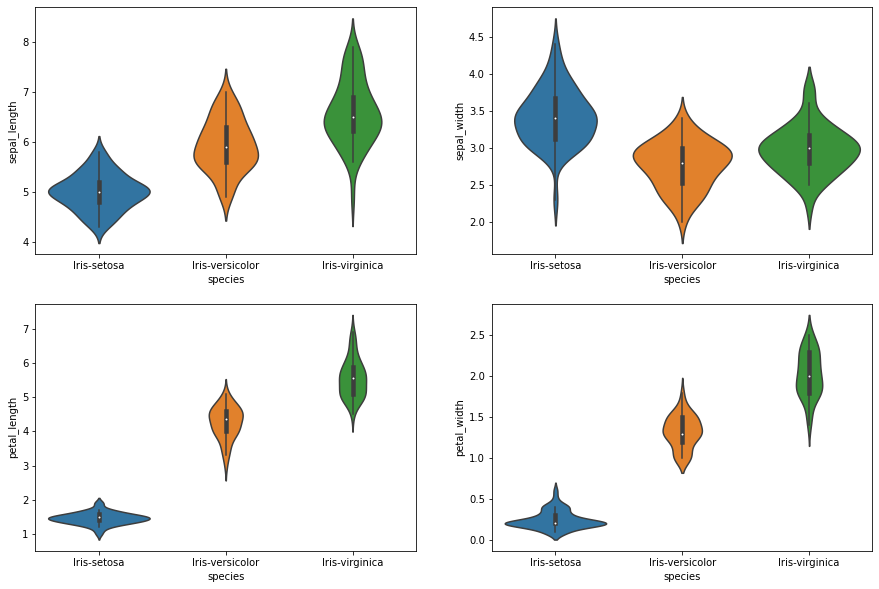

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=data)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

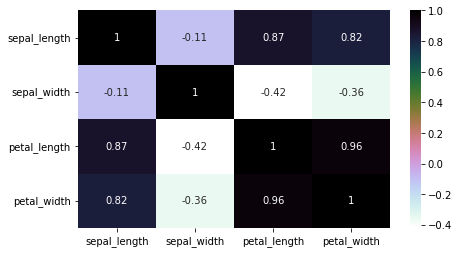

In [10]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [15]:
train,test= train_test_split(data,test_size=0.3) #train70% test30%로 나누기 
print(train.shape) # 훈련 데이터셋 확인
print(test.shape)  # 테스트 데이터셋 확인

(105, 5)
(45, 5)


In [17]:
# train학습,test테스트 데이터 분리
X_train=train[['sepal_length','sepal_width','petal_length','petal_width']]
X_test=test[['sepal_length','sepal_width','petal_length','petal_width']]
y_train=train.species
y_test=test.species

In [18]:
# Support Vector Machine Algorithm
model=svm.SVC()
model.fit(X_train,y_train) 
y_predict=model.predict(X_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of SVM is:",accu)

The accuracy of SVM is: 0.9555555555555556


In [19]:
# Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of Logistic Regression is:",accu)

The accuracy of Logistic Regression is: 0.9555555555555556


C:\Users\myungyi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# KNeighborsClassifier using k=3
model= KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of KNeighborsClassifier with 3 neighbors is:",accu)

The accuracy of KNeighborsClassifier with 3 neighbors is: 0.9333333333333333


C:\Users\myungyi\AppData\Local\Temp/ipykernel_19352/1980960326.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x1dec06272b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

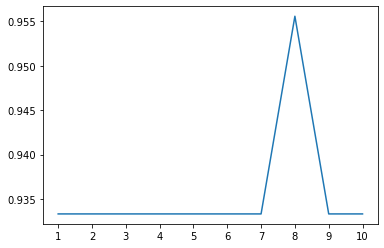

In [21]:
# KNeighborsClassifier using various values of k
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_predict,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [22]:
# Decision Tree Classifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of DecisionTreeClassifier is:",accu)


The accuracy of DecisionTreeClassifier is: 0.8888888888888888
